In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [39]:
companyDf = pd.read_csv("Company_Data.csv")
companyDf.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### EDA

In [40]:
companyDf.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [41]:
companyDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [42]:
companyDf.duplicated().sum()

0

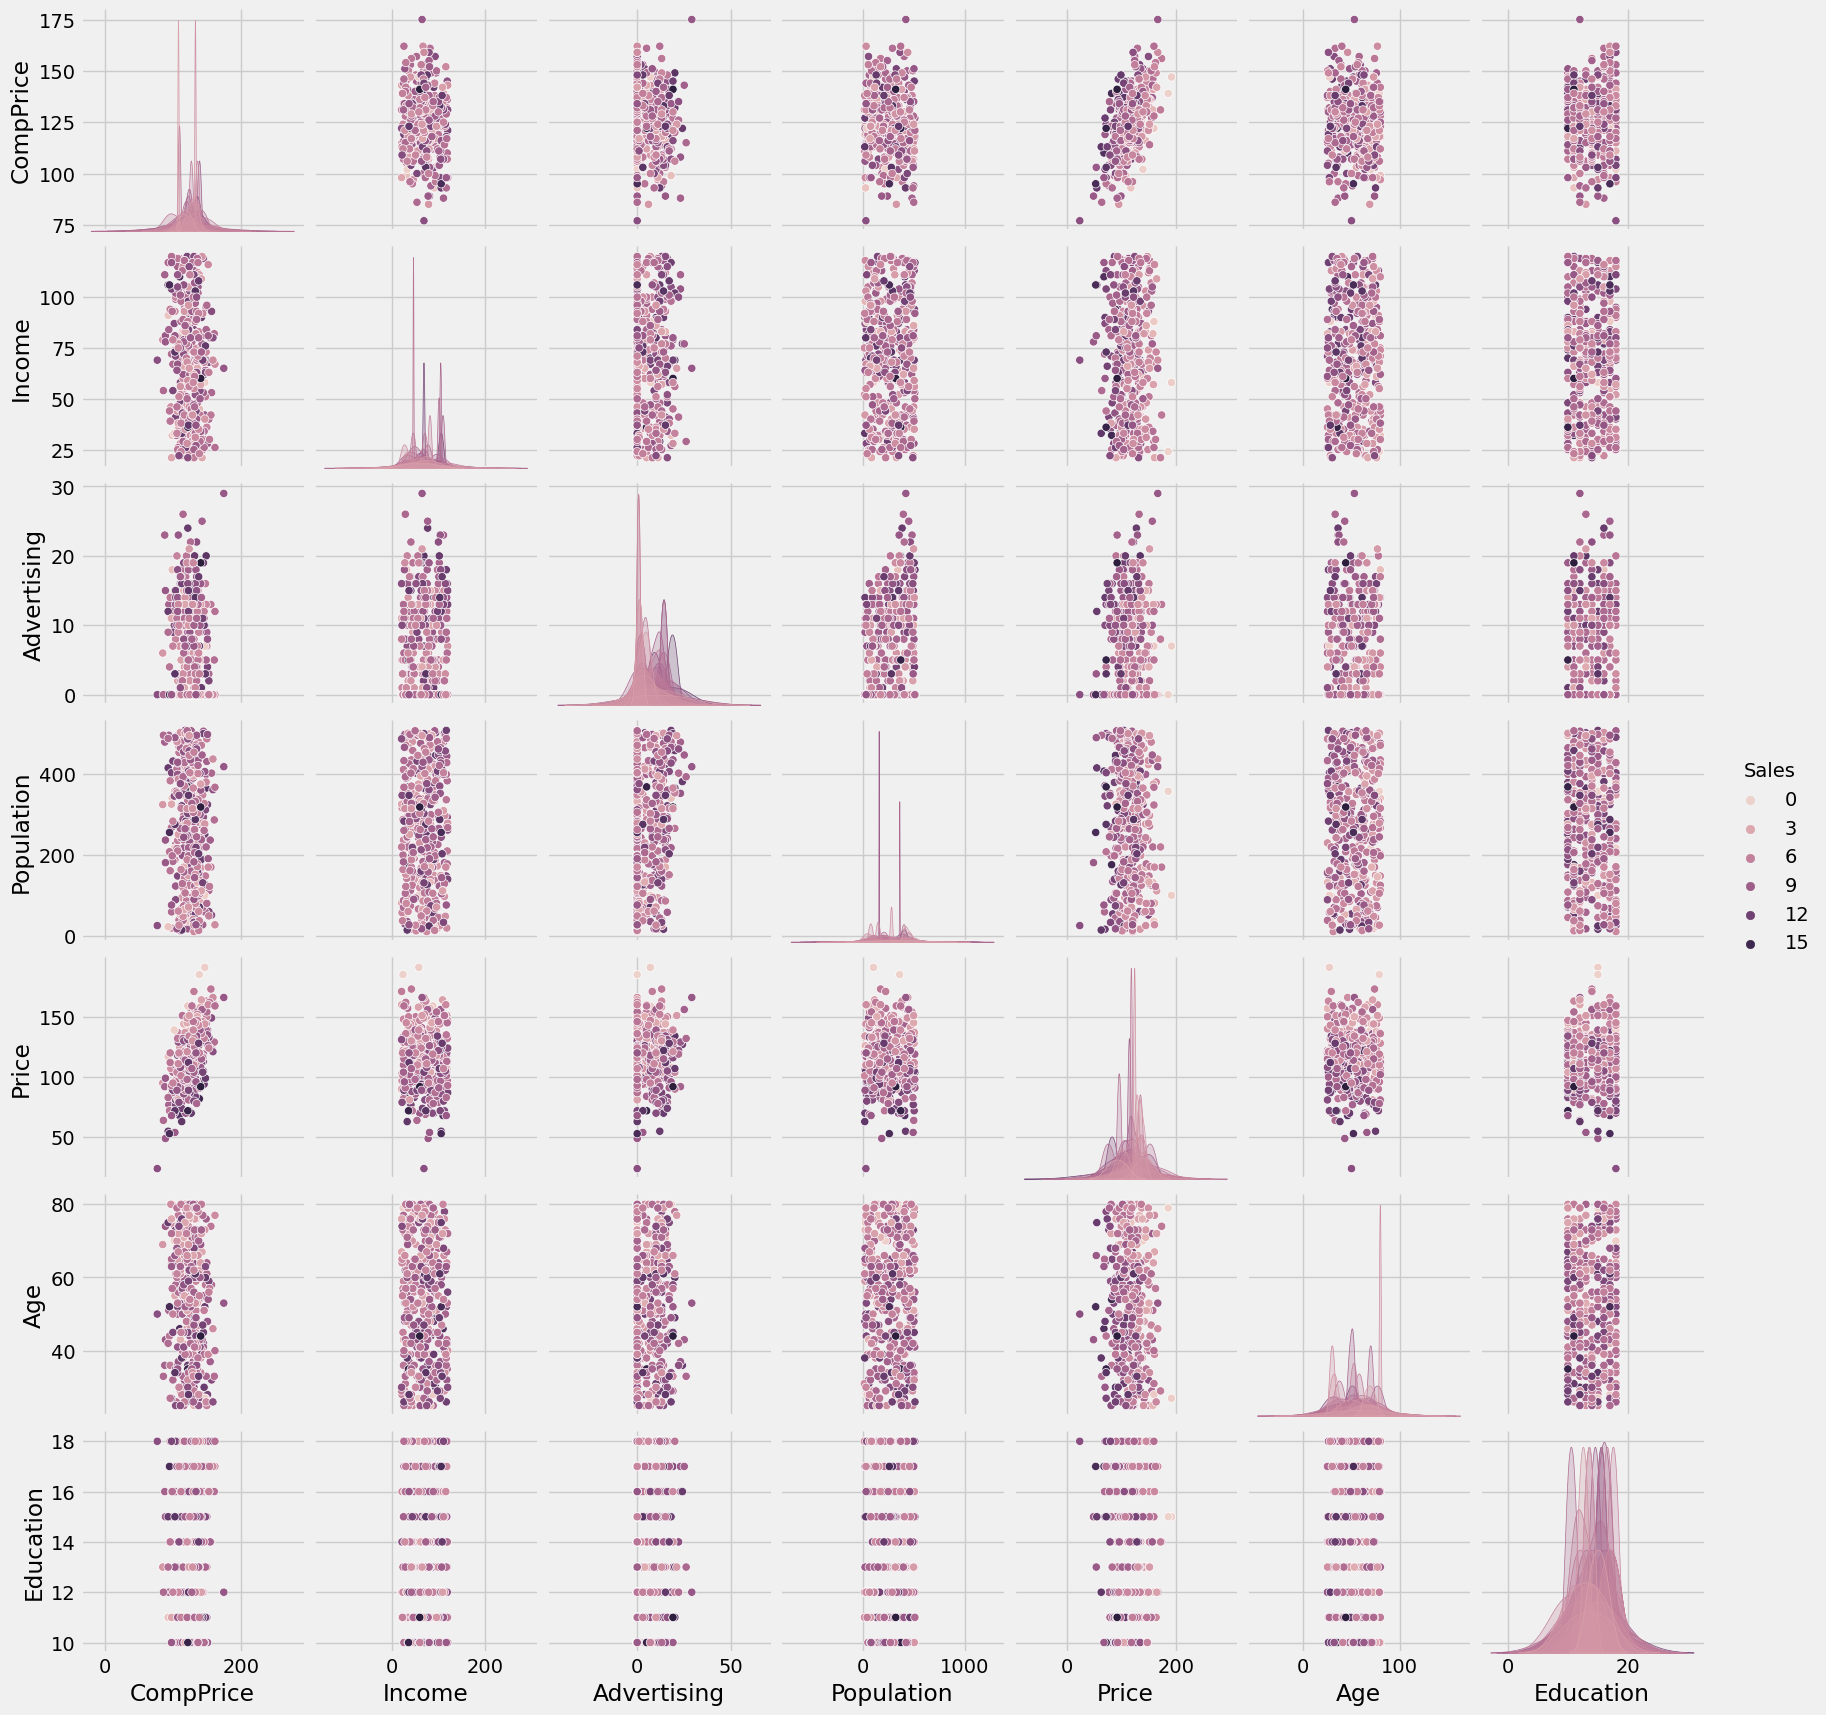

In [43]:
sns.pairplot(data=companyDf, hue = 'Sales')

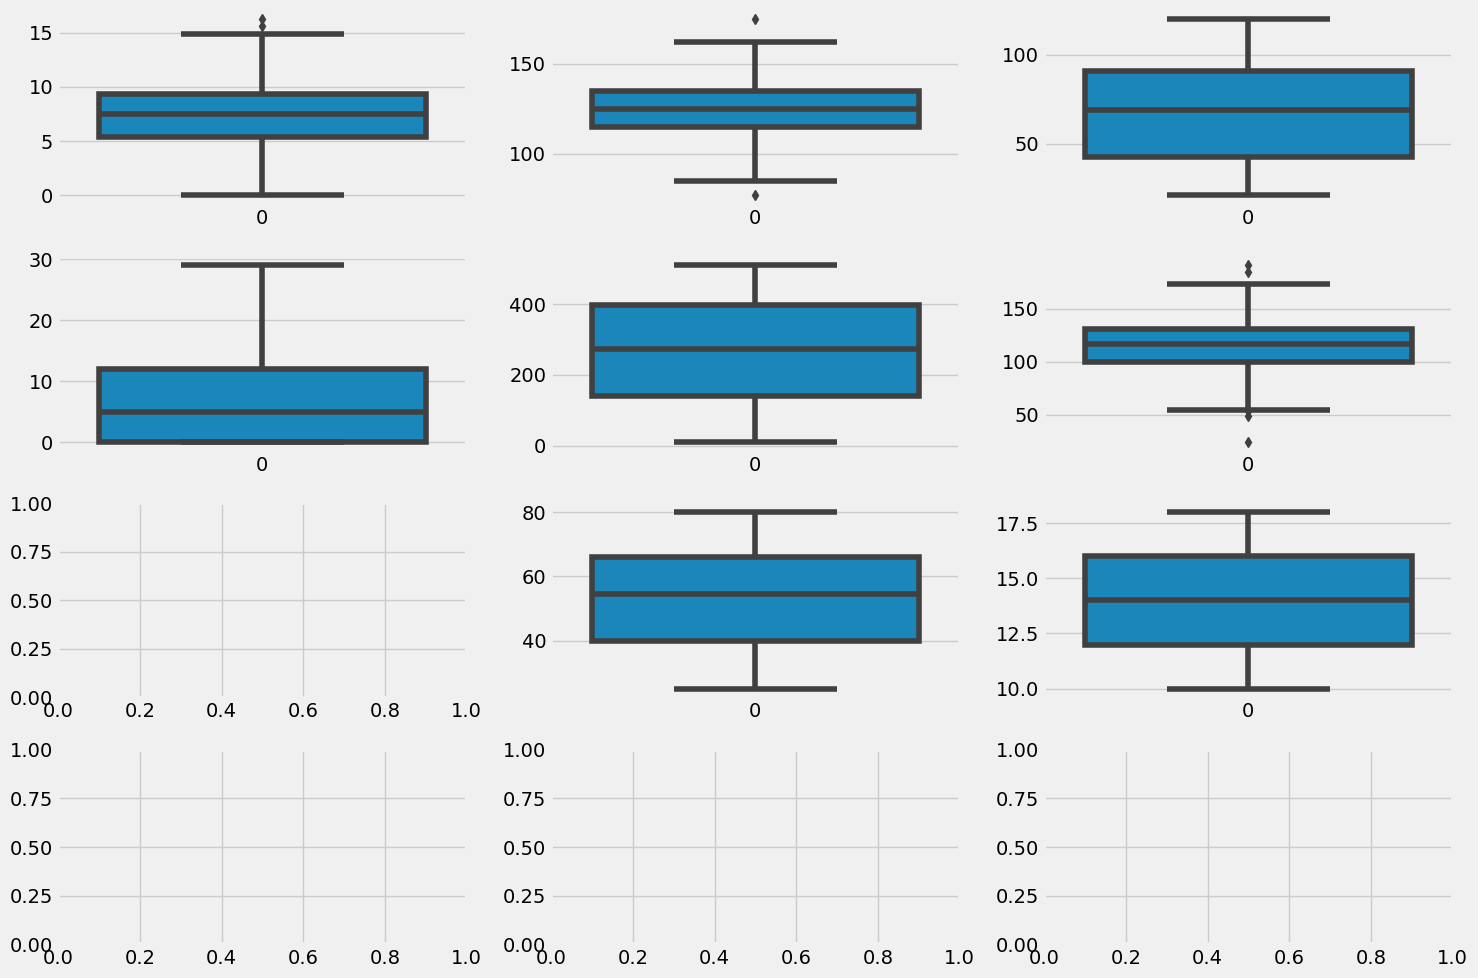

In [44]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(companyDf.Sales, ax=ax[0,0])
sns.boxplot(companyDf.CompPrice, ax=ax[0,1])
sns.boxplot(companyDf.Income, ax=ax[0,2])
sns.boxplot(companyDf.Advertising, ax=ax[1,0])
sns.boxplot(companyDf.Population, ax=ax[1,1])
sns.boxplot(companyDf.Price, ax=ax[1,2])
sns.boxplot(companyDf.Age, ax=ax[2,1])
sns.boxplot(companyDf.Education, ax=ax[2,2])

plt.tight_layout()
plt.show()

In [45]:
companyDf["sales"]=(companyDf["Sales"]>7.49)*1

In [46]:
label_encoder = preprocessing.LabelEncoder()
companyDf['ShelveLoc']= label_encoder.fit_transform(companyDf['ShelveLoc']) 
companyDf['Urban']= label_encoder.fit_transform(companyDf['Urban']) 
companyDf['US']= label_encoder.fit_transform(companyDf['US']) 

In [47]:
companyDf.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1


In [48]:
companyDf.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093,0.802045
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,0.035578
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,0.123460
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.251910
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.069327
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,-0.392275
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,0.106962
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,-0.186707
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,-0.028847
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,-0.047090


In [49]:
x = companyDf.iloc[:,1:6]
y = companyDf['sales']

In [50]:
x

,CompPrice,Income,Advertising,Population,Price
0,138,73,11,276,120
1,111,48,16,260,83
2,113,35,10,269,80
3,117,100,4,466,97
4,141,64,3,340,128
...,...,...,...,...,...
395,138,108,17,203,128
396,139,23,3,37,120
397,162,26,12,368,159
398,100,79,7,284,95


In [51]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales, Length: 400, dtype: int64

In [89]:
y.unique()

array([1, 0])

In [90]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [91]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', x_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', x_test.shape)

Training Features Shape: (320, 5)
Training Labels Shape: (320, 5)
Testing Features Shape: (80, 5)
Testing Labels Shape: (80, 5)


### Bagging

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=42, shuffle = True)
cart = DecisionTreeClassifier()
num_trees = 500
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7575000000000001


In [93]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf =  RandomForestClassifier(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

In [94]:
feature_list = list(x.columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Price                Importance: 0.33
Variable: CompPrice            Importance: 0.21
Variable: Income               Importance: 0.16
Variable: Advertising          Importance: 0.15
Variable: Population           Importance: 0.15


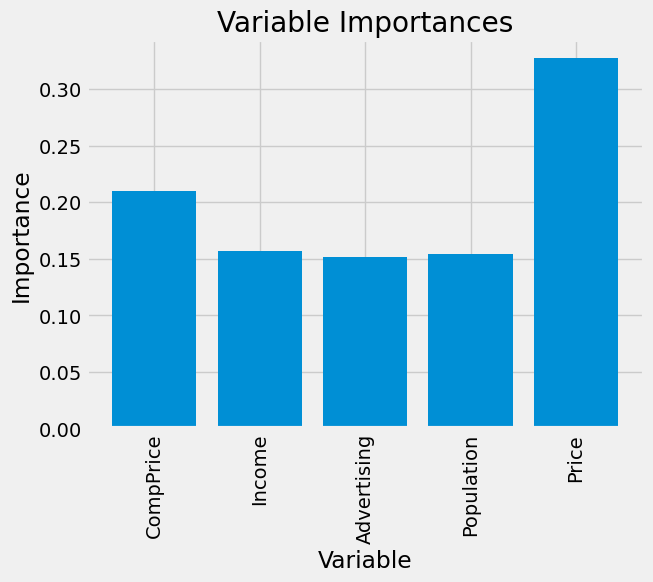

In [95]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

RandomForest

In [96]:
# New random forest with only the 4 most important variables
from sklearn.model_selection import KFold
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
rf_most_important = RandomForestClassifier(criterion='entropy',n_estimators=num_trees, max_features=max_features,random_state=42)



In [97]:
from sklearn import metrics 

# Train the random forest
rf_most_important.fit(x_train, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(x_test)
metrics.accuracy_score(y_test,predictions )

0.7625

In [98]:
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

### Hyperparameter Tuning
Using RandomizedSearch

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
              'min_samples_leaf': [5,10,20,50,100,200],
              'max_leaf_nodes':randint(1,20),
              'criterion':['entropy','gini'],
              'max_features':randint(1,5)
              
             }

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x137874450>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13781ecd0>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1372ab990>,
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             200],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1376e2750>})

In [105]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 16, 'max_features': 2, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'n_estimators': 230}


In [106]:

# Make predictions and determine the error
predictions = best_rf.predict(x_test)
metrics.accuracy_score(y_test,predictions )


0.775

Accuracy of the model is 77.5%

In [113]:
print(classification_report(predictions, y_test)) 

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        43
           1       0.73      0.81      0.77        37

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.78        80



<Axes: >

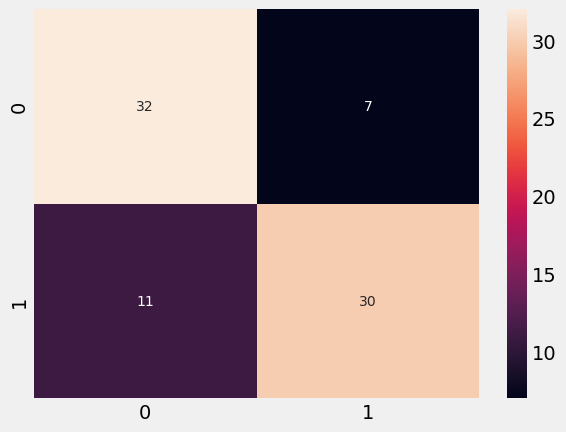

In [114]:
Confusion_m = confusion_matrix(y_test,predictions)
ax=plt.axes()
sns.heatmap(Confusion_m, annot=True,
            annot_kws={'size':10},
            ax=ax)

### Boosting

In [107]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


array = companyDf.values

X = array[:,1:6]
Y = array[:,6]

num_trees = 10
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.525


### Visualization

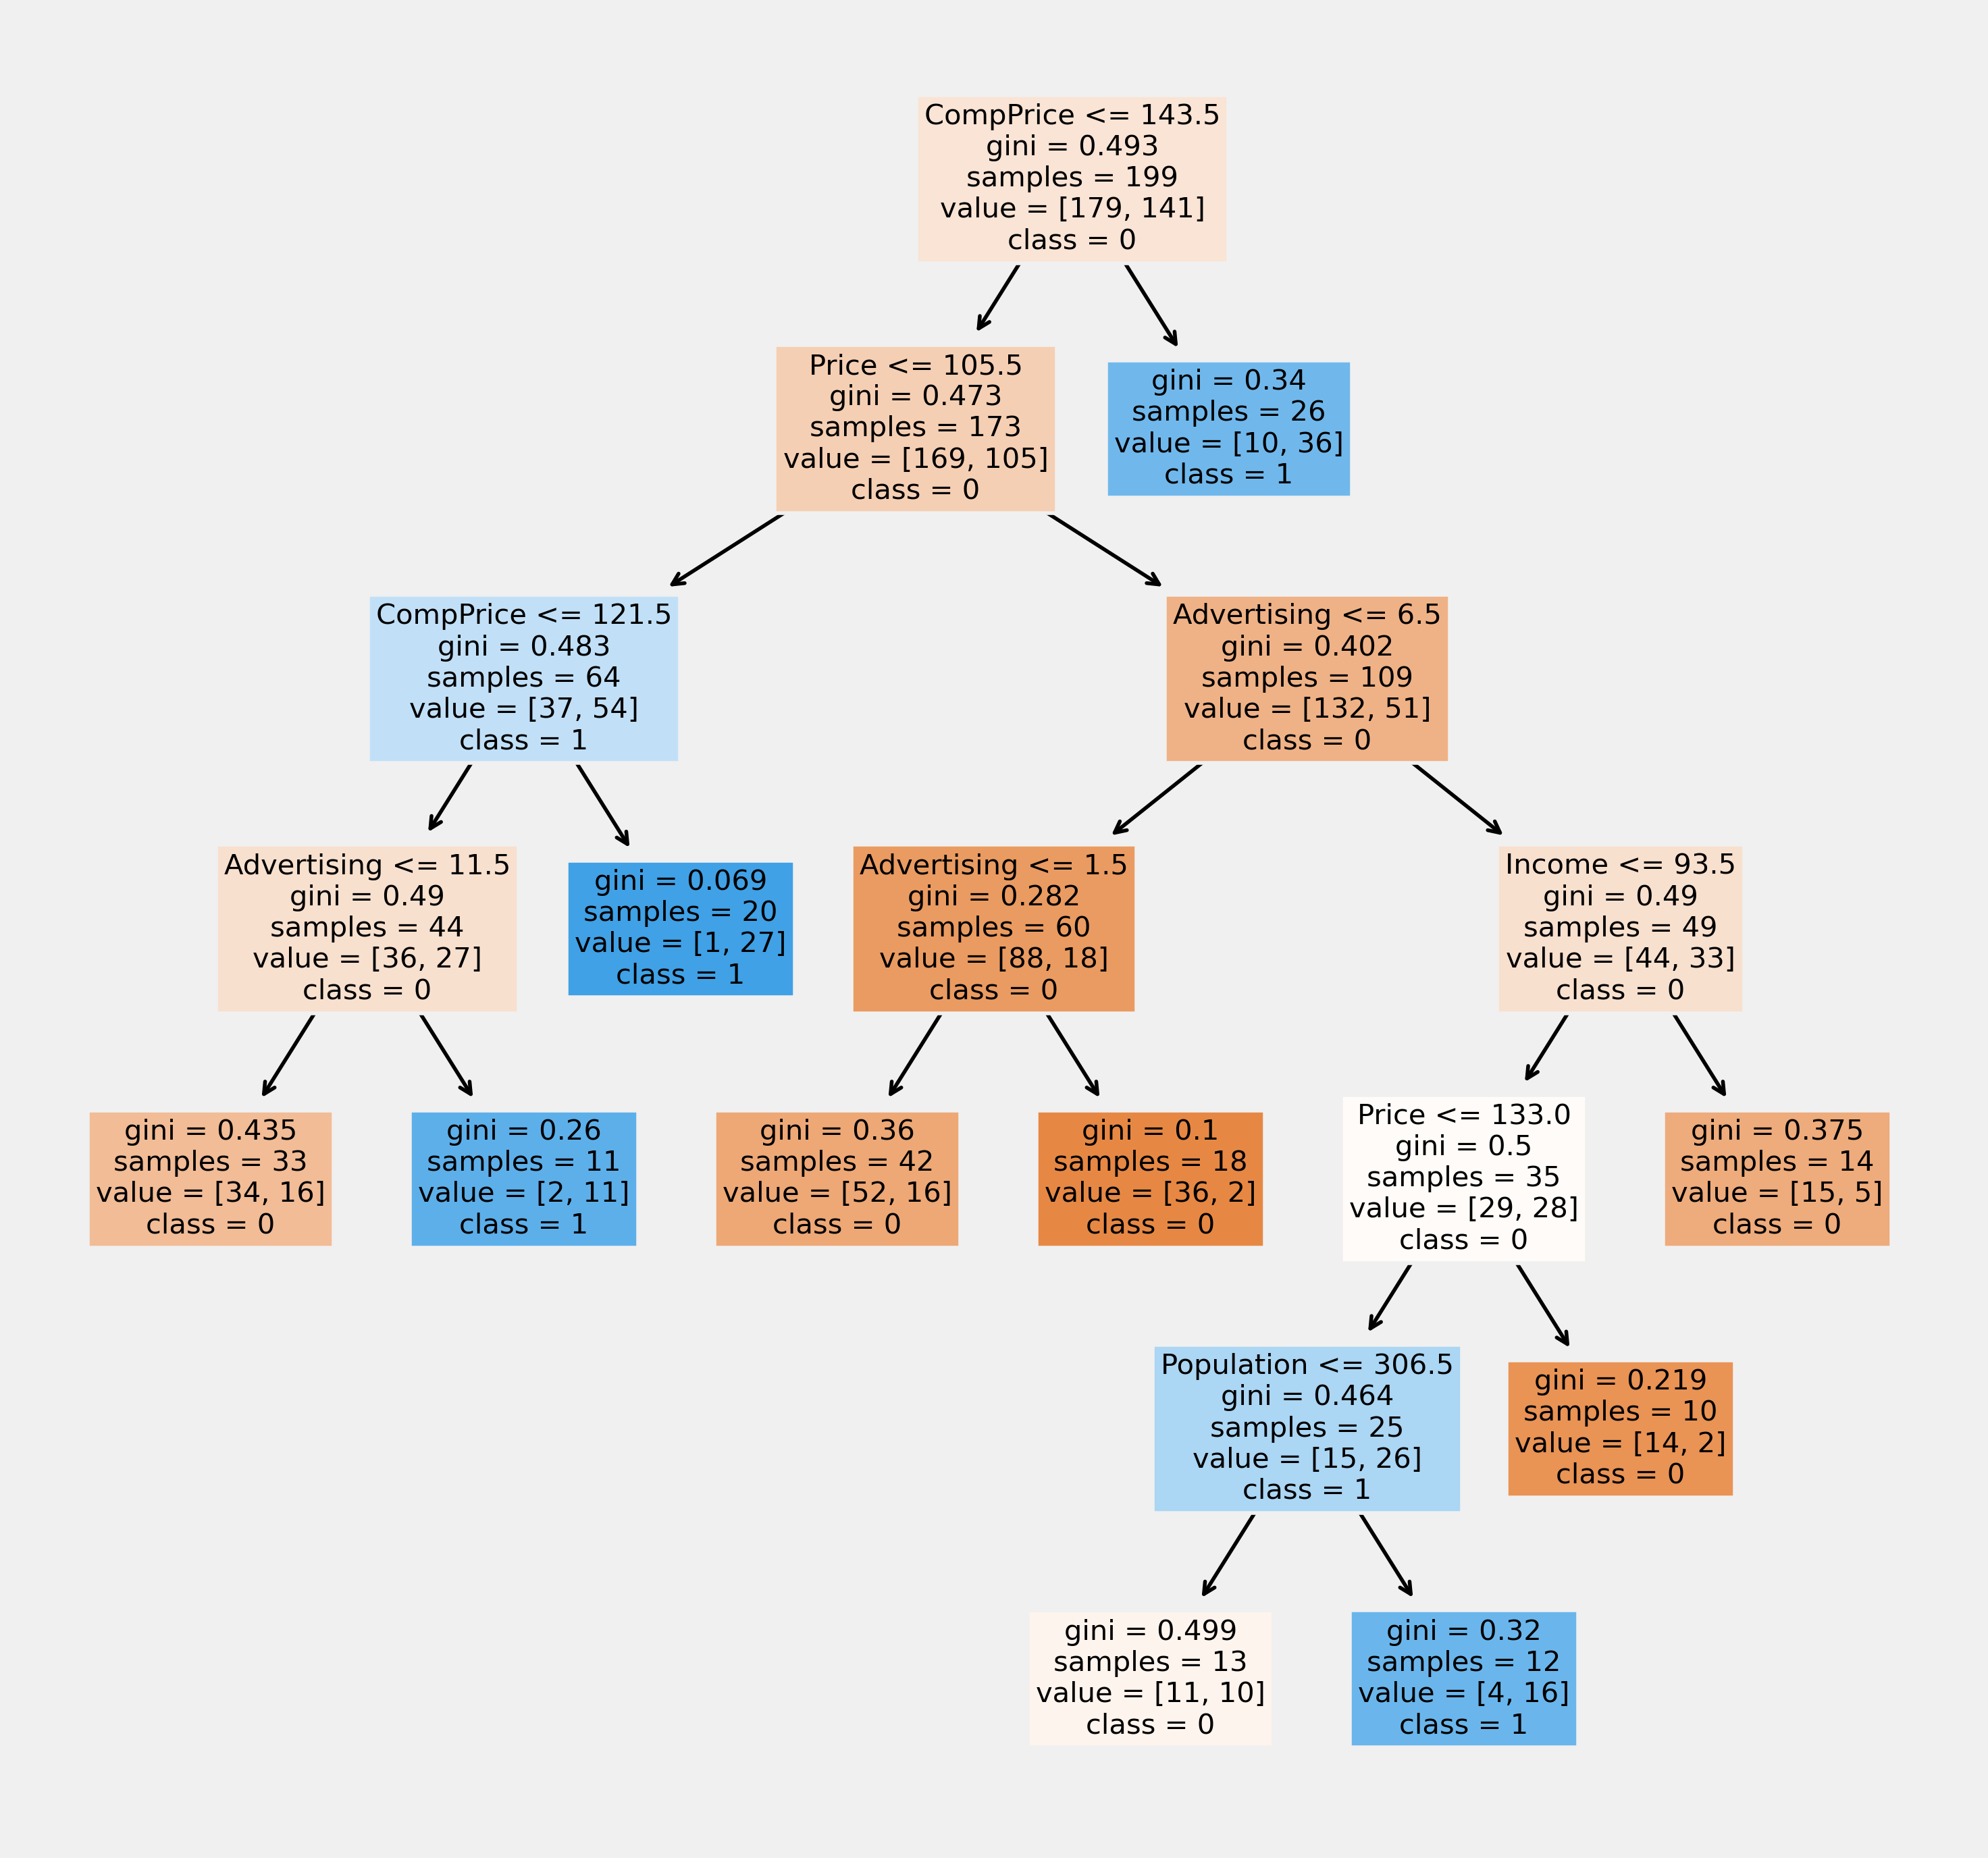

In [108]:
from sklearn import tree
fn = x.columns.tolist()
cn = ['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(best_rf.estimators_[8],
               feature_names = fn, 
               class_names=cn,
               filled = True);